**Section1: Start with importing necessary libraries, setting up parameters, importing the raw data file "SPEED Dataset 2005.xls", cleanse, arrange, rename and assign vaiables.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from ipykernel import kernelapp as app
from matplotlib import colors
import six
from matplotlib import style
style.use('ggplot')
#style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import axes3d

In [2]:
# Custom setting to enlarge pandas output
pd.set_option('display.height', 6000)
pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 150)

height has been deprecated.



The raw data file has 60 sheets in it, each sheet is one variable. A loop was created to import them and assign them to variables that will be used throughout the code.

In [3]:
# Importing all sheets in file. This may take a moment 
for i in range (2, 62):
    locals()['sheet_{}'.format(i-1)] = pd.read_excel('SPEED Dataset 2015.xls', sheetname=i, header=0, index_col=0)#, na_values=None)

Assign sheets to variables...

In [4]:
# Loop that create 60 sheets
sheetList = []
for i in range(1, 60+1):
    sheetList.append('sheet_{}'.format(i))
# Verify
sheetList[59]

'sheet_60'

In [5]:
# Import a sheet that has all the raw file sheets' names
Init_variables = pd.read_csv("variables_list.csv", header = None, index_col=None)
Init_variables.index = Init_variables.index+1
Init_variables.head()

,0
1,ag_ppp
2,ag_us
3,gdpag_ppp
4,agexp_aggdp
5,popag_ppp


In [6]:
# Sheets list to dataframe with the index matching the sheets name
sheetList = pd.DataFrame(sheetList)
sheetList.index = sheetList.index+1
sheetList.head()

,0
1,sheet_1
2,sheet_2
3,sheet_3
4,sheet_4
5,sheet_5


In [7]:
# Assign
for index, row in Init_variables.iterrows():
    sheetList[index] = Init_variables.loc[index]

Choosing only the top 10 economies in the world based on countries' GDP
(Source: http://statisticstimes.com/economy/countries-by-projected-gdp.php). Russia, France, Canada, and India were replaced by following countries from the list for lack of data in certain areas

In [8]:
Top10 = ['United States of America', 'China', 'Japan', 'Germany', 'United Kingdom', 'Italy', 'Brazil', 'Republic of Korea', 'Australia', 'Spain']
Top10

['United States of America',
 'China',
 'Japan',
 'Germany',
 'United Kingdom',
 'Italy',
 'Brazil',
 'Republic of Korea',
 'Australia',
 'Spain']

Choose variables to work with (depending on relevance and availabiliy of data), rename them and slice to show only the last 12 years (from 2000 to 2012)

In [9]:
# Agriculture expenditures
agrExp_ppp = sheet_1.ix[Top10, -13:]
agrExpToGDP_prct = sheet_3.ix[Top10, -13:]
agrExpPerCap_ppp = sheet_5.ix[Top10, -13:]
agrExp_TotExp_prct = sheet_6.ix[Top10, -13:]
# Education expenditures
eduExp_ppp = sheet_7.ix[Top10, -13:]
eduExpToGDP_prct = sheet_9.ix[Top10, -13:]
eduExpPerCap_ppp = sheet_10.ix[Top10, -13:]
eduExp_TotExp_prct = sheet_11.ix[Top10, -13:]
# Health expenditures
hltExp_ppp = sheet_12.ix[Top10, -13:]
hltExpToGDP_prct = sheet_14.ix[Top10, -13:]
hltExpPerCap_ppp = sheet_15.ix[Top10, -13:]
hltExp_TotExp_prct = sheet_16.ix[Top10, -13:]
# Defense expenditures
defExp_ppp = sheet_17.ix[Top10, -13:]
defExpToGDP_prct = sheet_19.ix[Top10, -13:]
defExpPerCap_ppp = sheet_20.ix[Top10, -13:]
defExp_TotExp_prct = sheet_21.ix[Top10, -13:]
# Social Protection expenditures
spExp_ppp = sheet_37.ix[Top10, -13:]
spExpToGDP_prct = sheet_39.ix[Top10, -13:]
spExpPerCap_ppp = sheet_40.ix[Top10, -13:]
spExp_TotExp_prct = sheet_41.ix[Top10, -13:]
# Other expenditures
otherExp_ppp = sheet_52.ix[Top10, -13:]
otherExpToGDP_prct = sheet_54.ix[Top10, -13:]
otherExpPerCap_ppp = sheet_55.ix[Top10, -13:]
otherExp_TotExp_prct = sheet_56.ix[Top10, -13:]
# Total expenditures
totExp_ppp = sheet_57.ix[Top10, -13:]
totExp_ppp = pd.DataFrame()
totExpToGDP_prct = sheet_59.ix[Top10, -13:]
#totExpToGDP_prct = pd.DataFrame()
totExpPerCap_ppp = sheet_60.ix[Top10, -13:]

In [10]:
agrExpToGDP_prct

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,
United States of America,0.354315,0.247071,0.200042,0.195410,0.125755,0.202857,0.187395,0.121973,0.124909,0.154232,0.142770,0.133007,0.109519
China,1.247142,1.336106,1.312100,1.284245,1.452336,1.307365,1.424693,1.277086,1.438094,2.562981,2.309126,2.102746,2.269456
Japan,0.239478,0.226687,0.229191,0.224915,0.229445,0.225639,0.212163,0.267654,0.304464,0.360828,0.327125,0.403774,0.400365
Germany,0.357021,0.345402,0.305787,0.296624,0.285103,0.269286,0.248066,0.224007,0.220309,0.225760,0.228056,0.224913,0.207396
United Kingdom,0.255790,0.336521,0.177999,0.183975,0.222759,0.248053,0.231126,0.208420,0.183028,0.185556,0.182416,0.184978,0.163041
Italy,0.481018,0.644561,0.615421,0.484257,0.455954,0.423565,0.518676,0.404453,0.371522,0.412056,0.399063,0.384014,0.328077
Brazil,0.515698,0.515216,0.457997,0.459143,0.519834,0.546582,0.600091,0.601558,0.464463,0.597142,0.497078,0.478458,0.500171
Republic of Korea,1.135450,1.079688,1.001620,1.171589,1.538736,0.989540,1.178594,1.232722,1.200580,1.185644,1.076176,0.932325,1.285127
Australia,0.250532,0.232201,0.249958,0.235216,0.195121,0.277597,0.259853,0.324932,0.216377,0.224790,0.181353,0.200232,0.149975


In [11]:
# Verify
totExpPerCap_ppp.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,
United States of America,7061.249023,7114.780762,7492.652832,7819.786133,8008.403809,8290.544922,8559.313477,8489.061523,9015.849609,10455.617188,10060.500977,10198.911133,9759.861328
China,517.269714,600.220459,687.311707,741.130066,795.625610,900.544617,1011.203430,1180.353760,1364.274170,1635.094360,1830.200317,2059.334717,2276.187988
Japan,5107.531738,4898.336914,4898.069336,4897.949219,5104.495605,5198.674805,5000.917480,5068.070312,5309.064941,6359.447266,6135.717285,6609.340820,6430.406250
Germany,13450.458984,14403.731445,14488.638672,14571.209961,14307.881836,14357.687500,14409.583008,14306.958008,14684.858398,15292.493164,15799.355469,15428.067383,15388.013672
United Kingdom,10707.799805,11930.428711,12479.700195,13202.466797,13822.607422,14439.077148,14829.790039,15149.384766,16240.355469,16539.515625,16392.541016,15856.488281,15759.561523


In [12]:
# Vaiables labels list
VarList_Final = [agrExp_ppp,   agrExpToGDP_prct,   agrExpPerCap_ppp,   agrExp_TotExp_prct, 
                 eduExp_ppp,   eduExpToGDP_prct,   eduExpPerCap_ppp,   eduExp_TotExp_prct, 
                 hltExp_ppp,   hltExpToGDP_prct,   hltExpPerCap_ppp,   hltExp_TotExp_prct, 
                 defExp_ppp,   defExpToGDP_prct,   defExpPerCap_ppp,   defExp_TotExp_prct, 
                 spExp_ppp,    spExpToGDP_prct,    spExpPerCap_ppp,    spExp_TotExp_prct, 
                 otherExp_ppp, otherExpToGDP_prct, otherExpPerCap_ppp, otherExp_TotExp_prct, 
                 totExp_ppp,   totExpToGDP_prct,   totExpPerCap_ppp]

Check all values for null and non-numeric values

In [13]:
# Null values
for index in range (0,26+1):
    s = VarList_Final[index].isnull().sum()
    if index == 0: print('\nThis is the {}st variable in VarList_Final list'.format(index+1))
    elif index == 1: print('\nThis is the {}nd variable in VarList_Final list'.format(index+1))
    elif index == 2: print('\nThis is the {}rd variable in VarList_Final list'.format(index+1))
    else: print('\nThis is the {}th variable in VarList_Final list'.format(index+1))
    print(s)
# No nulls


This is the 1st variable in VarList_Final list
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
dtype: int64

This is the 2nd variable in VarList_Final list
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
dtype: int64

This is the 3rd variable in VarList_Final list
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
dtype: int64

This is the 4th variable in VarList_Final list
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
dtype: int64

This is the 5th variable in VarList_Final list
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
dtype: int64

This is the 6th variable in VarList_Final li

In [14]:
# Data types
for index in range (0,27):
    s = VarList_Final[index].dtypes
    if index == 0: print('\nThis is the {}st variable in VarList_Final list'.format(index+1))
    elif index == 1: print('\nThis is the {}nd variable in VarList_Final list'.format(index+1))
    elif index == 2: print('\nThis is the {}rd variable in VarList_Final list'.format(index+1))
    else: print('\nThis is the {}th variable in VarList_Final list'.format(index+1))
    print(s)
# All floats


This is the 1st variable in VarList_Final list
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
dtype: object

This is the 2nd variable in VarList_Final list
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
dtype: object

This is the 3rd variable in VarList_Final list
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
dtype: object

This is the 4th variable in VarList_Final list
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float6

**Section 2: Check all sectors for all records for abnormal values (per capita data)**

In [15]:
# Assign variables, dropna, and check count for each sector
eduPerCap_unfltrd = sheet_10.ix[0:147, -6]; eduPerCap_unfltrd.dropna(axis=0, how='any', inplace=True); 
eduPerCap_unfltrd = pd.DataFrame(eduPerCap_unfltrd); eduPerCap_unfltrd.columns = ['Education-2007']; 
print("Number of countries for education :", eduPerCap_unfltrd.count())

hltPerCap_unfltrd = sheet_15.ix[0:147, -6]; hltPerCap_unfltrd.dropna(axis=0, how='any', inplace=True);
hltPerCap_unfltrd = pd.DataFrame(hltPerCap_unfltrd); hltPerCap_unfltrd.columns = ['Health-2007']; 
print("Number of countries for health :", hltPerCap_unfltrd.count())

defPerCap_unfltrd = sheet_20.ix[0:147, -6]; defPerCap_unfltrd.dropna(axis=0, how='any', inplace=True);
defPerCap_unfltrd = pd.DataFrame(defPerCap_unfltrd); defPerCap_unfltrd.columns = ['Defense-2007']; 
print("Number of countries for defense :", defPerCap_unfltrd.count())

spPerCap_unfltrd = sheet_40.ix[0:147, -6]; spPerCap_unfltrd.dropna(axis=0, how='any', inplace=True);
spPerCap_unfltrd = pd.DataFrame(spPerCap_unfltrd); spPerCap_unfltrd.columns = ['S. Protection-2007']; 
print("Number of countries for social protection :", spPerCap_unfltrd.count())

Number of countries for education : Education-2007    126
dtype: int64
Number of countries for health : Health-2007    126
dtype: int64
Number of countries for defense : Defense-2007    116
dtype: int64
Number of countries for social protection : S. Protection-2007    123
dtype: int64


In [16]:
allCoun_allSec = eduPerCap_unfltrd.join(hltPerCap_unfltrd).join(defPerCap_unfltrd).join(spPerCap_unfltrd)
allCoun_allSec.dropna(axis=0, how='any', inplace=True); allCoun_allSec.count()
allCoun_allSec.head()

,Education-2007,Health-2007,Defense-2007,S. Protection-2007
country,,,,
China,168.875641,47.183472,84.289627,129.156326
Fiji,285.099609,151.596039,93.845467,6.036186
Indonesia,36.880718,14.373800,115.123077,35.789074
Malaysia,888.111450,259.874298,347.847992,294.668365
Mongolia,359.514648,194.974503,87.363991,451.667145


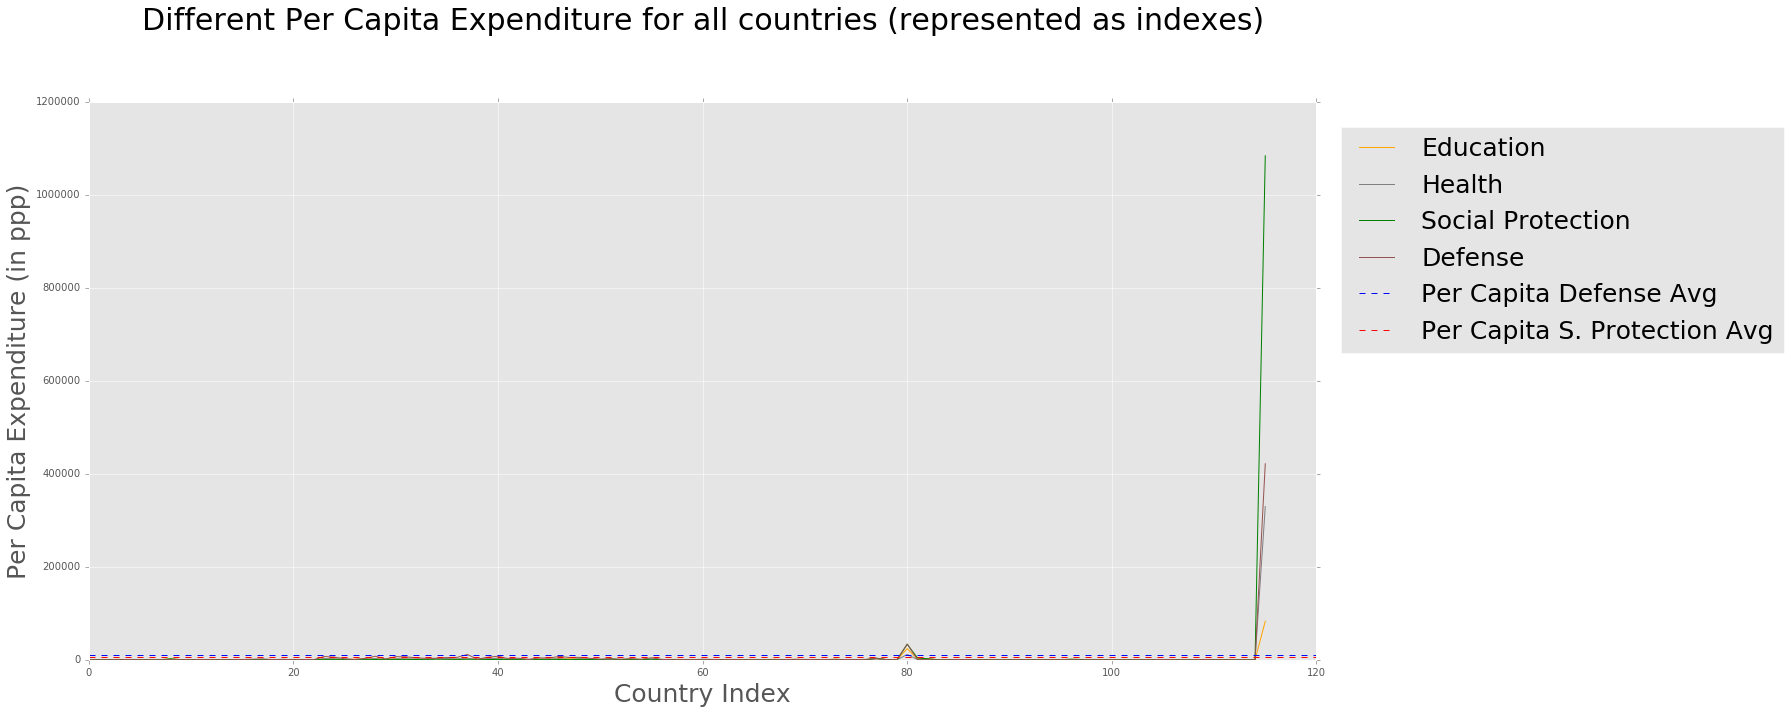

In [17]:
### Plot for the total Per Capita Spendings for all four sectors and 70 countries over 12 years
style.use('ggplot')
fig = plt.figure()
# Plot size
plt.figure(figsize=(22,10))

# List of index that refers to countries
countryIndex = []
for i in range(0, 115+1):
    countryIndex.append(i)

# List of colors
col_list = ["orange", "gray", "green", "#955351"]
col_list

# Label list
Division_list = ["Education", "Health", "Social Protection", "Defense"]

# Plot function
def plot_data(country, df_index, colors):
    plt.plot(country, df_index, label=Division_list[i], color= colors)#

# Plot
for i in range (0,3+1):
    plot_data(countryIndex, allCoun_allSec.transpose().ix[i], col_list[i])# Please substitute the 50 with another random value if colors are unclear

# H-lines
plt.axhline(allCoun_allSec.transpose().loc["Defense-2007"].mean(), color='b', linewidth=1, ls='--', label='Per Capita Defense Avg')
plt.axhline(allCoun_allSec.transpose().loc["S. Protection-2007"].mean(), color='r', linewidth=1, ls='--', label='Per Capita S. Protection Avg')

# Title, labels, and legends
plt.xlabel('Country Index', fontsize=25)
plt.ylabel('Per Capita Expenditure (in ppp)', fontsize=25)
plt.title('Different Per Capita Expenditure for all countries (represented as indexes)\n \n', fontsize=30)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=25)
plt.show()

There is a big spike in one of the last countries, and relatively in the middle...

In [18]:
print(" Middle anomaly", allCoun_allSec.iloc[75:85, :])
print("\n \nEnd anomaly", allCoun_allSec.tail(10))

 Middle anomaly                                 Education-2007   Health-2007  Defense-2007  S. Protection-2007
country                                                                                       
Iran (Islamic Republic of)          258.476105    176.733353    343.577240          456.603729
Jordan                              482.054749    247.520981    579.076843          970.221130
Kuwait                             2342.575439   1652.925903   3403.575195         3102.027832
Lebanon                             269.681793     86.471710    357.372742          290.622284
Morocco                             294.576477     44.129028    168.148666          234.676559
Occupied Palestinian Territory    23983.597656  11470.947266  33459.617188        33778.812500
Oman                               1765.280518    571.854858   3995.058350          629.977051
Qatar                              2299.387939   1590.871826   2195.580078           80.795853
Syrian Arab Republic              

Occupied Palestinian Territory and Zimbabwe values do not seem to be sensible, especially the latter. After checking the values on the World Bank platform, Zimbabwe's records are far from accurate, and will have to be corrected or removed 

**Section 3: Derive some variables that are excluded from the raw data due to missing figures. Get an insight into the expenditure for different sesector of the 5 strongest economies in the world**

Now we have Agriculture, Education, Health, Defense and Other expenses for 10 countries. Mining, communication, and fuel data are excluded but will later on added to the "other" variable so that we have 4 sectors and others that includes all of the other expenditures for any country. The given "total expenditure" will be derived rather than used from the raw data due to lack of figures

In [19]:
# Import population of the 10 countries (source: World bank), filter on only our top 10 countries and the year of 2014
# Check names are consistent with before 
population_test = pd.read_csv("Population data.csv", index_col = 2).ix[Top10,"2014 [YR2014]"]
population_test

Country Name
United States of America           NaN
China                       1364270000
Japan                        127131800
Germany                       80982500
United Kingdom                64613160
Italy                         60789140
Brazil                       206077898
Republic of Korea                  NaN
Australia                     23464086
Spain                         46480882
Name: 2014 [YR2014], dtype: object

United States and Korea have different names

In [20]:
population_raw = pd.read_csv("Population data.csv", index_col = 0)
# Rename
population_raw['Country'] = population_raw['Country Name']
population_raw.set_index('Country', inplace = True)
try:
    population_raw.ix['United States','Country Name'] = 'United States of America'
except:
    pass
try:
    population_raw.ix['Korea, Rep.', 'Country Name'] = 'Republic of Korea'
except:
    pass
population_raw.tail(10)

,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
Country,,,,,,,,,,,,,,,
Virgin Islands (U.S.),SP.POP.TOTL,Virgin Islands (U.S.),VIR,103963,108639.0,107423.0,107091.0,106707.0,106267.0,105784.0,105275,104737,104170,103574,..
West Bank and Gaza,SP.POP.TOTL,West Bank and Gaza,WBG,1978248,2922153.0,3494496.0,3596688.0,3702218.0,3811102.0,3927051.0,4046901,4169506,4294682,4422143,..
"Yemen, Rep.",SP.POP.TOTL,"Yemen, Rep.",YEM,11961099,17795219.0,21701105.0,22322699.0,22954226.0,23591972.0,24234940.0,24882792,25533217,26183676,26832215,..
Zambia,SP.POP.TOTL,Zambia,ZMB,8143142,10585220.0,12738676.0,13114579.0,13507849.0,13917439.0,14343526.0,14786581,15246086,15721343,16211767,..
Zimbabwe,SP.POP.TOTL,Zimbabwe,ZWE,10484771,12499981.0,13297798.0,13495462.0,13720997.0,13973897.0,14255592.0,14565482,14898092,15245855,15602751,..
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Back to population dataframe
population_raw.set_index('Country Name', inplace=True)
population_raw = population_raw.ix[Top10,"2014 [YR2014]"]
population_raw = pd.DataFrame(population_raw)
population_raw.rename(columns={'2014 [YR2014]':'2014'}, inplace=True)
population_raw = population_raw.astype(float)
population_raw.dtypes

2014    float64
dtype: object

In [22]:
population_raw

,2014
Country Name,
United States of America,3.189074e+08
China,1.364270e+09
Japan,1.271318e+08
Germany,8.098250e+07
United Kingdom,6.461316e+07
Italy,6.078914e+07
Brazil,2.060779e+08
Republic of Korea,5.042396e+07
Australia,2.346409e+07


In [23]:
# Create total expenditure dataframe for the top 10 countries by using the per capita expenditure and population of that country
for column in totExpPerCap_ppp:
    totExp_ppp[column] = totExpPerCap_ppp[column]*1e-9*population_raw['2014']
totExp_ppp.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,
United States of America,2251.884574,2268.956241,2389.462441,2493.787672,2553.939245,2643.916134,2729.628415,2707.224547,2875.221167,3334.373703,3208.368219,3252.508242,3112.492010
China,705.695553,818.862766,937.678742,1011.101515,1085.448151,1228.586004,1379.554504,1610.321224,1861.238322,2230.710183,2496.887387,2809.488574,3105.334987
Japan,649.329703,622.734389,622.700371,622.685100,648.943714,660.916886,635.775641,644.312901,674.950982,808.487978,780.044783,840.257395,817.509121


Now to caluclate the new Other (including mining, communication and fuel):
New Other = Total expenditure - (old other + agricultural + Health + education + social protection + defense expenditures)
All values are in Billion ppp

In [24]:
TotalOtherExp = totExp_ppp - (agrExp_ppp + eduExp_ppp + hltExp_ppp + defExp_ppp + spExp_ppp + otherExp_ppp)
TotalOtherExp.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,
United States of America,294.924287,283.016834,281.444510,274.622944,254.257803,239.853081,221.912557,197.262209,182.395319,175.982809,150.599263,123.620078,93.011800
China,43.368555,45.844548,47.388780,45.549604,42.848948,41.508979,38.550763,95.923211,98.275862,239.244042,256.630501,292.625893,294.756217
Japan,23.879628,18.433298,17.515362,14.167548,13.515467,10.938246,9.893087,12.392688,17.575109,45.355961,22.839725,27.617993,33.048754
Germany,23.414699,22.300248,17.260286,13.746152,10.639892,11.021896,13.263799,16.093504,19.920165,21.817644,23.164763,25.938879,27.818874
United Kingdom,76.259918,89.795249,94.855321,99.946892,98.150291,100.237646,100.354047,96.239782,95.572393,97.576030,80.548678,69.582556,62.480824


Here I will check countries' educational, health, social protection and other expenditures 
relative to the total expenditure of that country in 2012 (only for the top 5 countries in terms of GDP)

In [25]:
Top5GDPs = ['United States of America', 'China', 'Japan', 'Germany', 'United Kingdom']
Label_list = ["Education", "Health", "Social Protection", 'Defense', 'Other']
USA_fp = pd.DataFrame([eduExp_ppp.ix[Top5GDPs].iloc[0,12],
                        hltExp_ppp.ix[Top5GDPs].iloc[0,12],
                        spExp_ppp.ix[Top5GDPs].iloc[0,12],
                        defExp_ppp.ix[Top5GDPs].iloc[0,12],
                        TotalOtherExp.ix[Top5GDPs].iloc[0,12]])

China_fp = pd.DataFrame([eduExp_ppp.ix[Top5GDPs].iloc[1,12],
                        hltExp_ppp.ix[Top5GDPs].iloc[1,12],
                        spExp_ppp.ix[Top5GDPs].iloc[1,12],
                        defExp_ppp.ix[Top5GDPs].iloc[1,12],
                        TotalOtherExp.ix[Top5GDPs].iloc[1,12]])

Japan_fp = pd.DataFrame([eduExp_ppp.ix[Top5GDPs].iloc[2,12],
                        hltExp_ppp.ix[Top5GDPs].iloc[2,12],
                        spExp_ppp.ix[Top5GDPs].iloc[2,12],
                        defExp_ppp.ix[Top5GDPs].iloc[2,12],
                        TotalOtherExp.ix[Top5GDPs].iloc[2,12]])

Germany_fp = pd.DataFrame([eduExp_ppp.ix[Top5GDPs].iloc[3,12],
                          hltExp_ppp.ix[Top5GDPs].iloc[3,12],
                          spExp_ppp.ix[Top5GDPs].iloc[3,12],
                          defExp_ppp.ix[Top5GDPs].iloc[3,12],
                          TotalOtherExp.ix[Top5GDPs].iloc[3,12]])

UK_fp = pd.DataFrame([eduExp_ppp.ix[Top5GDPs].iloc[4,12],
                      hltExp_ppp.ix[Top5GDPs].iloc[4,12],
                      spExp_ppp.ix[Top5GDPs].iloc[4,12],
                      defExp_ppp.ix[Top5GDPs].iloc[4,12],
                      TotalOtherExp.ix[Top5GDPs].iloc[4,12]])

In [26]:
# check
print(Top5GDPs[0], Top5GDPs[3])
USA_fp

United States of America Germany


,0
0,79.568245
1,303.773834
2,1674.208862
3,593.856323
4,93.011800


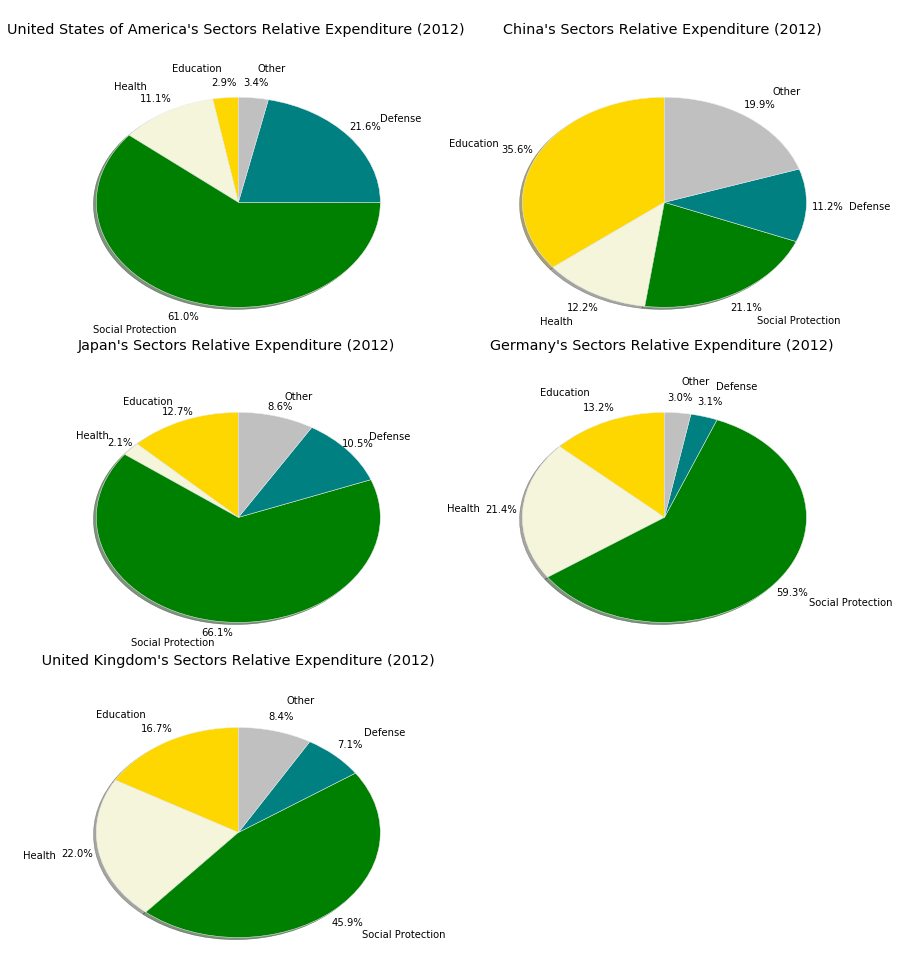

In [27]:
# Plot expenditures of different sector for each of the top5 countries as a relative value.
style.use('ggplot')
fig = plt.figure()
plt.figure(figsize=(14,16))

# To get a list of colors
col_list = ["gold", "beige", "green", "teal", "silver"]
col_list
test = [5,4,3,6,7]
# 1st plot -- US
ax1 = plt.subplot2grid((3,2), (0,0), rowspan=1, colspan=1)
ax1.pie(USA_fp, labels=Label_list,
        colors = col_list,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',pctdistance=1.15, labeldistance=1.28)
plt.title("\n{}'s Sectors Relative Expenditure (2012) \n \n".format(Top5GDPs[0]))

# 2nd plot -- China 
ax2 = plt.subplot2grid((3,2), (0,1), rowspan=1, colspan=1)
ax2.pie(China_fp, labels=Label_list,
        colors = col_list,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',pctdistance=1.15, labeldistance=1.3)
plt.title("\n{}'s Sectors Relative Expenditure (2012) \n \n".format(Top5GDPs[1]))

# 3rd plot -- Japan
ax3 = plt.subplot2grid((3,2), (1,0), rowspan=1, colspan=1)
ax3.pie(Japan_fp, labels=Label_list,
        colors = col_list,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',pctdistance=1.1, labeldistance=1.2)
plt.title(" \n \n{}'s Sectors Relative Expenditure (2012) \n \n".format(Top5GDPs[2]))

# 4th plot -- Germany
ax4 = plt.subplot2grid((3,2), (1,1), rowspan=1, colspan=1)
ax4.pie(Germany_fp, labels=Label_list,
        colors = col_list,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',pctdistance=1.15, labeldistance=1.3)
plt.title(" \n \n{}'s Sectors Relative Expenditure (2012) \n \n".format(Top5GDPs[3]))

# 5th plot -- UK  
ax5 = plt.subplot2grid((3,2), (2,0), rowspan=1, colspan=1)
ax5.pie(UK_fp, labels=Label_list,
        colors = col_list,
        startangle=90,
        shadow=True,
        autopct='%1.1f%%',pctdistance=1.15, labeldistance=1.3)
plt.title(" \n {}'s Sectors Relative Expenditure (2012) \n \n".format(Top5GDPs[4]))

plt.show()

 
**Section 4: Explore the individual sectors expenditures in the top 10 countries** 

In [28]:
# Add avg column for all sectors
totExp_ppp["Avg"] = totExp_ppp.mean(numeric_only=True, axis=1)
agrExp_ppp["Avg"] = agrExp_ppp.mean(numeric_only=True, axis=1)
eduExp_ppp["Avg"] = eduExp_ppp.mean(numeric_only=True, axis=1)
hltExp_ppp["Avg"] = hltExp_ppp.mean(numeric_only=True, axis=1)
defExp_ppp["Avg"] = defExp_ppp.mean(numeric_only=True, axis=1)
spExp_ppp["Avg"]  = spExp_ppp.mean(numeric_only=True, axis=1)

In [29]:
# Top 5 countries in total expenditure (depending on average)
totExp_ppp.sort_values(by="Avg", ascending=False)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Avg
country,,,,,,,,,,,,,,
United States of America,2251.884574,2268.956241,2389.462441,2493.787672,2553.939245,2643.916134,2729.628415,2707.224547,2875.221167,3334.373703,3208.368219,3252.508242,3112.492010,2755.520201
China,705.695553,818.862766,937.678742,1011.101515,1085.448151,1228.586004,1379.554504,1610.321224,1861.238322,2230.710183,2496.887387,2809.488574,3105.334987,1636.992916
Germany,1089.251795,1166.450182,1173.326181,1180.013011,1158.688041,1162.721428,1166.924056,1158.613227,1189.216545,1238.424328,1279.471304,1249.403467,1246.159817,1189.127952
United Kingdom,691.864782,770.862699,806.352865,853.053100,893.122345,932.954402,958.199597,978.849622,1049.340686,1068.670369,1059.173875,1024.537814,1018.275070,931.173633
Italy,772.154223,815.149717,804.408086,815.222557,814.225117,822.812829,844.435241,838.339587,840.052546,842.520799,828.536150,819.871858,809.404134,820.548680
Japan,649.329703,622.734389,622.700371,622.685100,648.943714,660.916886,635.775641,644.312901,674.950982,808.487978,780.044783,840.257395,817.509121,694.511459
Spain,457.908043,462.781455,471.557899,472.261240,485.690810,489.494390,500.789925,521.675047,549.387503,582.967126,577.789682,566.798088,579.191099,516.791716
Brazil,393.717258,409.973740,420.824400,412.136753,430.463422,467.313833,497.990762,533.135999,557.695494,570.710048,594.203633,613.954207,646.868007,503.768274
Republic of Korea,160.541871,168.130024,185.553999,183.791709,178.950443,180.035272,192.211057,257.941280,271.623357,283.364334,290.749276,283.094314,352.638403,229.894257


In [30]:
# Top 5 countries with most agricultural expenditures
agrExp_ppp.sort_values(by="Avg", ascending=False)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Avg
country,,,,,,,,,,,,,,
China,51.344357,59.572758,63.815590,68.722755,85.555542,85.725983,105.261688,107.718933,132.986343,258.847778,257.573120,256.352936,297.981293,140.881467
United States of America,40.954586,28.829302,23.756371,23.853983,15.934190,26.565001,25.194489,16.692247,17.044481,20.455929,19.410534,18.417149,15.586346,22.514970
Republic of Korea,9.997401,9.884164,9.825101,11.814469,16.233564,10.852683,13.595524,14.945955,14.890808,14.752543,14.236784,12.787920,17.987322,13.215711
Japan,8.777264,8.337997,8.454514,8.436594,8.809690,8.776402,8.391939,10.818959,12.178653,13.635522,12.936994,15.874919,16.047266,10.882824
Brazil,8.835786,8.943441,8.161524,8.275762,9.904907,10.743622,12.262144,13.040890,10.588672,13.568333,12.145561,12.010093,12.664610,10.857334
Italy,7.591757,10.362392,9.938579,7.816734,7.487256,7.020164,8.785571,6.966104,6.324928,6.629573,6.531166,6.314858,5.258352,7.463649
Spain,5.932864,6.821877,6.661484,6.751513,7.148055,7.319810,7.396606,7.853041,8.224201,7.150080,6.383233,5.963686,7.205659,6.985547
Germany,8.892721,8.733601,7.732724,7.472836,7.265981,6.909874,6.600886,6.155537,6.119501,5.948255,6.249844,6.369159,5.913550,6.951113
United Kingdom,4.435643,5.963111,3.226515,3.466528,4.330500,4.978205,4.766275,4.445336,3.873729,3.724184,3.721922,3.816374,3.367970,4.162792


It's somewhat surprising to see Japan and Korea higher in the list than Germany, UK and Spain. Let's explore agriculture more with some plots.

In [31]:
# Choose five countries to plot
countrList_Agr = ["Republic of Korea", "Japan", "United Kingdom", "Spain","Australia", "Germany"]
agrExp_ppp_Slct = agrExp_ppp.ix[countrList_Agr]
agrExp_ppp_Slct.Avg

country
Republic of Korea    13.215711
Japan                10.882824
United Kingdom        4.162792
Spain                 6.985547
Australia             1.688696
Germany               6.951113
Name: Avg, dtype: float64

In [32]:
agrExp_ppp_Slct = agrExp_ppp_Slct.ix[:,:-1]
agrExp_ppp_Slct

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,
Republic of Korea,9.997401,9.884164,9.825101,11.814469,16.233564,10.852683,13.595524,14.945955,14.890808,14.752543,14.236784,12.787920,17.987322
Japan,8.777264,8.337997,8.454514,8.436594,8.809690,8.776402,8.391939,10.818959,12.178653,13.635522,12.936994,15.874919,16.047266
United Kingdom,4.435643,5.963111,3.226515,3.466528,4.330500,4.978205,4.766275,4.445336,3.873729,3.724184,3.721922,3.816374,3.367970
Spain,5.932864,6.821877,6.661484,6.751513,7.148055,7.319810,7.396606,7.853041,8.224201,7.150080,6.383233,5.963686,7.205659
Australia,1.512649,1.456833,1.617648,1.585381,1.357044,1.989404,1.932787,2.507933,1.697591,1.800416,1.487859,1.698833,1.308676
Germany,8.892721,8.733601,7.732724,7.472836,7.265981,6.909874,6.600886,6.155537,6.119501,5.948255,6.249844,6.369159,5.913550


Plot this dataframe

/Users/askar/anaconda/lib/python3.5/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


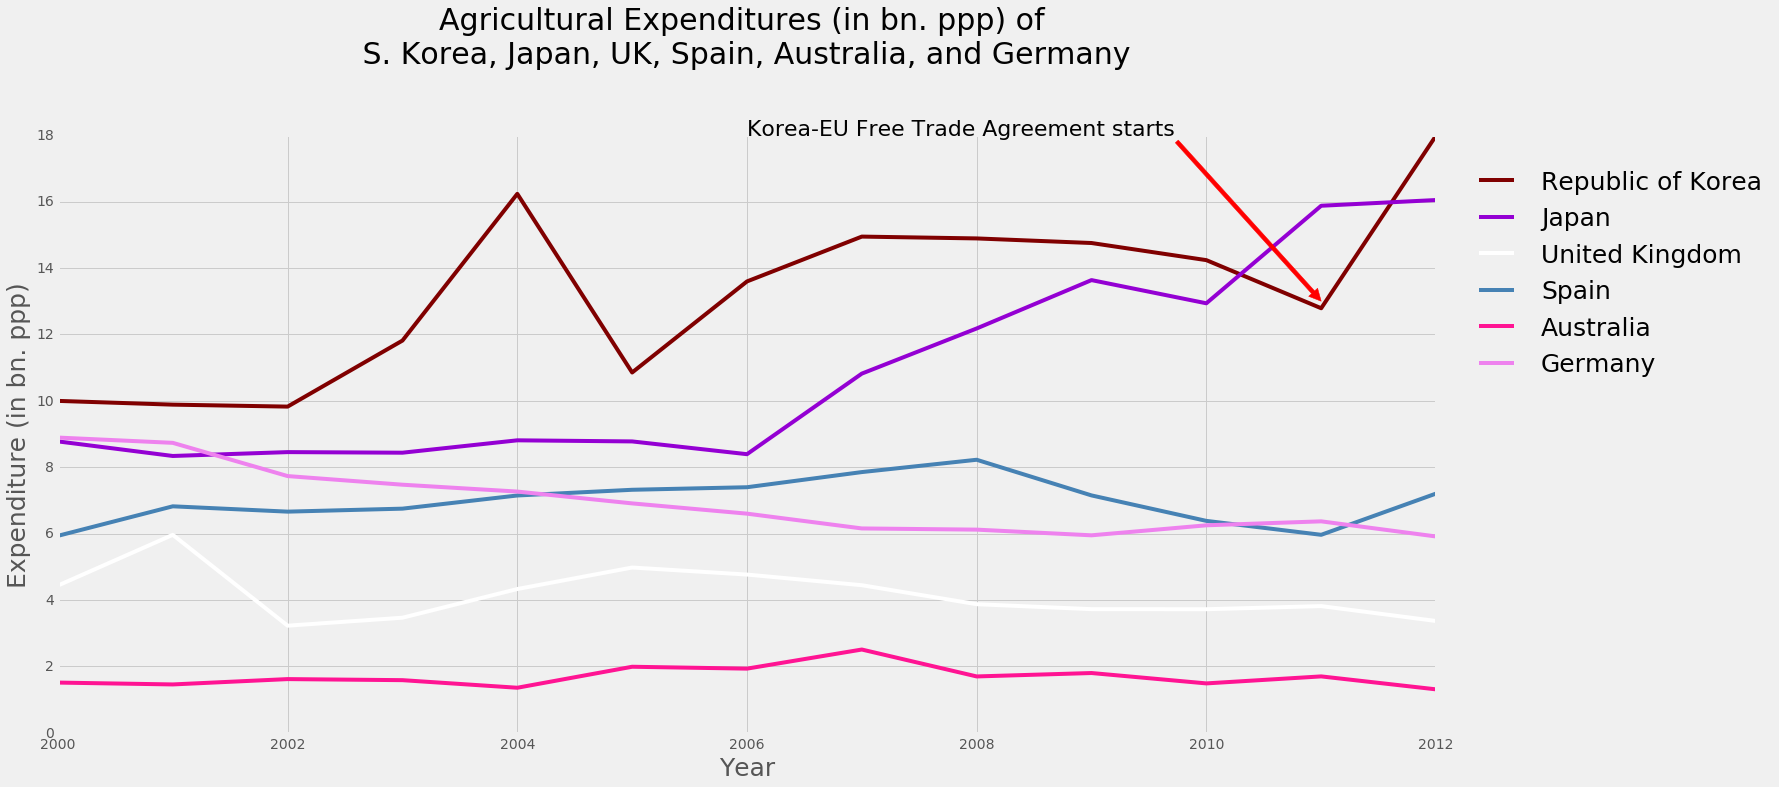

In [39]:
style.use('fivethirtyeight')
fig = plt.figure()

# Create a list of years that contains the column headers (2000 to 2012)
years = []
for i in range(2000, 2012+1):
    years.append(i)

# List of random colors
col_list = list(six.iteritems(colors.cnames))
col_list

# Label list
countrList_Agr

# Plot size
plt.figure(figsize=(22,10))

# Plot function
def plot_data(years, df_index, colors):
    plt.plot(years, df_index, label=countrList_Agr[i], color= colors)
# Plot
for i in range (0,5+1):
    plot_data(years, agrExp_ppp_Slct.ix[i], col_list[(i+10)][0])# Please add any other random value to i if colors are unclear

# Annatation
plt.annotate('Korea-EU Free Trade Agreement starts', (2011, 13), xytext=(0.5, 1), textcoords='axes fraction',
            arrowprops= dict(facecolor='grey', color='red'), fontsize=22)

# Title, labels, and legends
plt.xlabel('Year', fontsize=25)
plt.ylabel('Expenditure (in bn. ppp)', fontsize=25)
plt.title('Agricultural Expenditures (in bn. ppp) of \n S. Korea, Japan, UK, Spain, Australia, and Germany \n \n', fontsize=30)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1, fontsize=25)
plt.show()

In July 2011, the Free-Trade agreement between S. Korea started taking place, which could explain the peak (Source: United States Department of Agriculture -- https://www.ers.usda.gov/topics/international-markets-trade/countries-regions/south-korea/policy/#ricemarket).

Let's check the Agriculture Expenditure as a percentage of the GDP

In [40]:
# Filter on the same 6 countries and add Average
agrExpToGDP_prct_Slct = agrExpToGDP_prct.ix[countrList_Agr]
agrExpToGDP_prct_Slct['Avg'] = agrExpToGDP_prct_Slct.mean(numeric_only=True, axis=1)
agrExpToGDP_prct_Slct.ix[:,"Avg"]

country
Republic of Korea    1.154445
Japan                0.280902
United Kingdom       0.212589
Spain                0.593059
Australia            0.230626
Germany              0.264441
Name: Avg, dtype: float64

In [41]:
agrExpToGDP_prct.head(5)
# Those values are percentages

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,
United States of America,0.354315,0.247071,0.200042,0.195410,0.125755,0.202857,0.187395,0.121973,0.124909,0.154232,0.142770,0.133007,0.109519
China,1.247142,1.336106,1.312100,1.284245,1.452336,1.307365,1.424693,1.277086,1.438094,2.562981,2.309126,2.102746,2.269456
Japan,0.239478,0.226687,0.229191,0.224915,0.229445,0.225639,0.212163,0.267654,0.304464,0.360828,0.327125,0.403774,0.400365
Germany,0.357021,0.345402,0.305787,0.296624,0.285103,0.269286,0.248066,0.224007,0.220309,0.225760,0.228056,0.224913,0.207396
United Kingdom,0.255790,0.336521,0.177999,0.183975,0.222759,0.248053,0.231126,0.208420,0.183028,0.185556,0.182416,0.184978,0.163041


This dataframe is showing that countries are spending too little on Agriculture 

Explore Education...

In [42]:
# Top 5 countries with most education expenditures
eduExp_ppp.sort_values(by="Avg", ascending=False)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Avg
country,,,,,,,,,,,,,,
China,126.793716,148.416290,167.108307,177.694809,192.934784,221.247223,255.067947,225.338120,263.695465,302.239868,347.528229,425.552338,528.629700,260.172830
United Kingdom,83.955734,91.789330,102.033287,108.435242,111.225906,118.437889,125.630081,128.837067,133.852127,137.573898,139.383926,128.133774,124.502647,117.983916
Germany,101.177513,105.103958,105.779396,105.429176,104.962082,105.216965,107.569153,108.174500,110.341904,115.824509,121.525963,123.346855,123.617790,110.620751
United States of America,60.395039,62.699226,76.321060,87.572403,90.795670,97.555000,114.948341,86.623528,84.621719,73.361504,116.076004,90.238762,79.568245,86.213577
Italy,71.838509,74.777199,75.315865,77.374596,74.863159,77.219490,77.295784,78.483368,74.877762,74.719803,73.013443,68.974411,66.592163,74.257350
Spain,44.251358,45.078072,46.970409,48.276794,50.442898,50.868690,53.115719,56.026463,59.534622,62.770248,61.237064,59.598934,54.571358,53.287895
Japan,48.379181,46.673870,47.682278,46.581730,48.641735,44.638462,39.110340,41.471363,42.146439,47.082657,47.148701,48.360016,48.462070,45.875295
Republic of Korea,26.675255,31.224699,29.085035,28.084856,29.717936,34.789452,36.241440,37.608864,40.455662,42.895370,42.338844,42.507351,53.336750,36.535501
Brazil,27.861023,27.598276,28.087072,26.630650,25.931086,28.883377,29.791286,31.555368,36.138004,40.132404,45.614059,51.073055,42.035709,33.948567


Plot the average education expenditure (only the top 5 countries)

In [43]:
FiveCountries_Edu = ["China", "United Kingdom", "Germany", "United States of America", "Italy"]
EduComp = eduExp_ppp.ix[FiveCountries_Edu].Avg
EduComp

country
China                       260.172830
United Kingdom              117.983916
Germany                     110.620751
United States of America     86.213577
Italy                        74.257350
Name: Avg, dtype: float64

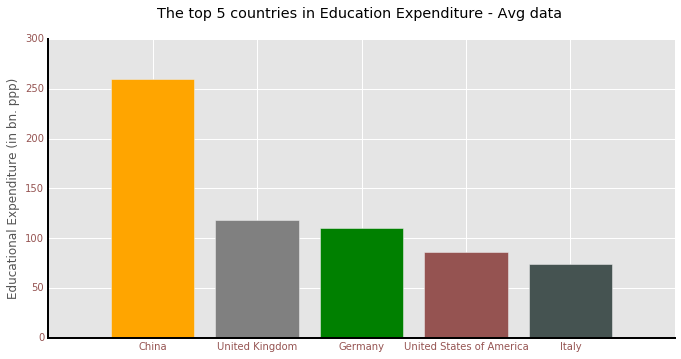

In [44]:
# Plot Average Aducational Expenditures
style.use('ggplot')
fig = plt.figure()

Mycolors = ["orange", "gray", "green", "#955351", "#455351"]
Mycolors

# Plot size
plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,1),(0,0))

Country_index = []
for i in range (4+1):
    Country_index.append(i)
    
# Plot bar chart
for i in range (4+1):
    ax1.bar(Country_index[i], EduComp.ix[i, 0], color = Mycolors[i], 
            label= FiveCountries_Edu[i], align='center')

# Replace number on x-axis with labels
plt.xticks(Country_index, FiveCountries_Edu)

# Customize label
for label in ax1.xaxis.get_ticklabels():
    label.set_color('#955351')

# Customize labels
for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# Title and labels
plt.title("The top 5 countries in Education Expenditure - Avg data \n")
plt.ylabel('Educational Expenditure (in bn. ppp)')
plt.show()

It's surprising to see Italy spending more than Japan in average. China is spendign more than double the second-ranked UK (avg). However, using the total expenditure here is misleading as the population of china is roughly 21 times that of the UK, 16.8 times that of Germany,22 times that of Italy's, and around 4.3 times the US's. In order for the comparison to be meaningful we will multiply US education spendings by 4.3, Germany's by 16.8, Italy's by 22.6, and UK's by 21 and plot the results.

In [45]:
EduComp_Scaled = eduExp_ppp.ix[FiveCountries_Edu,:]
# UK
EduComp_Scaled.iloc[1, -1] = EduComp_Scaled.iloc[1, -1] * 21
# Germany
EduComp_Scaled.iloc[2, -1] = EduComp_Scaled.iloc[2, -1] * 16.8
# US
EduComp_Scaled.iloc[3, -1] = EduComp_Scaled.iloc[3, -1] * 4.3
# Italy
EduComp_Scaled.iloc[4, -1] = EduComp_Scaled.iloc[4, -1] * 22.6
EduComp_Scaled = EduComp_Scaled['Avg']
EduComp_Scaled

country
China                        260.172830
United Kingdom              2477.662237
Germany                     1858.428617
United States of America     370.718381
Italy                       1678.216111
Name: Avg, dtype: float64

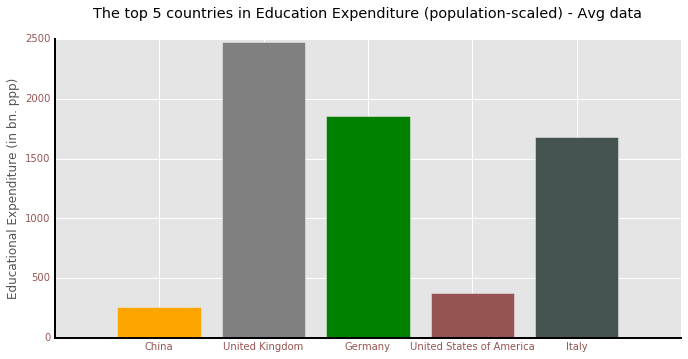

In [46]:
# Plot population-scaled education expenditure in all 5 countries
EduComp_Scaled = pd.DataFrame(EduComp_Scaled)
FiveCountries_Edu = EduComp_Scaled.index.tolist()

style.use('ggplot')
fig = plt.figure()

Mycolors = ["orange", "gray", "green", "#955351", "#455351"]
Mycolors

# Plot size
plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,1),(0,0))

Country_index = []
for i in range (4+1):
    Country_index.append(i)
    
# Plot bar chart
for i in range (4+1):
    ax1.bar(Country_index[i], EduComp_Scaled.ix[i, 0], color = Mycolors[i], 
            label= FiveCountries_Edu[i], align='center')

# Replace number on x-axis with labels
plt.xticks(Country_index, FiveCountries_Edu)

# Customize label
for label in ax1.xaxis.get_ticklabels():
    label.set_color('#955351')

# Customize labels
for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# Title and labels
plt.title("The top 5 countries in Education Expenditure (population-scaled) - Avg data\n")
plt.ylabel('Educational Expenditure (in bn. ppp)')
plt.show()

This plot is certainly more sensible, yet plotting the per capita education expenditure for those countries would be less emperical while roughly giving the same results...

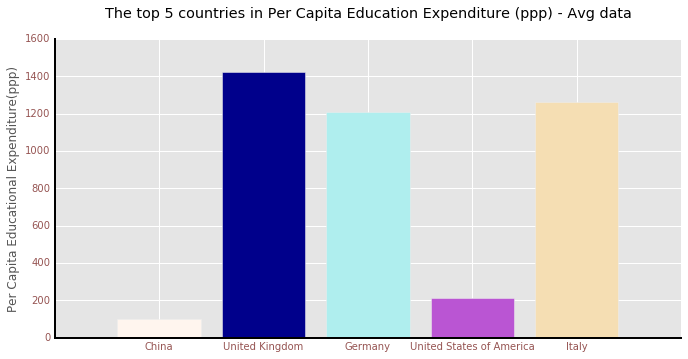

In [47]:
Edu_perCapita_Top5 = eduExpPerCap_ppp.ix[FiveCountries_Edu,:]
Edu_perCapita_Top5["Avg"] = Edu_perCapita_Top5.mean(numeric_only=True, axis=1)
# Plot population-scaled education expenditure in 5 countries
style.use('ggplot')
fig = plt.figure()

Mycolors = list(six.iteritems(colors.cnames))
Mycolors

# Plot size
plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,1),(0,0))

Country_index = []
for i in range (4+1):
    Country_index.append(i)
    
# Plot bar chart
for i in range (4+1):
    ax1.bar(Country_index[i], Edu_perCapita_Top5.ix[i, 0], color = Mycolors[i], 
            label= FiveCountries_Edu[i], align='center')

# Replace number on x-axis with labels
plt.xticks(Country_index, FiveCountries_Edu)

# Customize label
for label in ax1.xaxis.get_ticklabels():
    label.set_color('#955351')

# Customize labels
for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# Title and labels
plt.title("The top 5 countries in Per Capita Education Expenditure (ppp) - Avg data\n")
plt.ylabel('Per Capita Educational Expenditure(ppp)')
plt.show()

The UK's per capita educational expenditure is 7 times US's, while the US's GDP is more than 7 times the UK's (2016 data). It's notable here that reason of the slight difference between both of the previous plots is possibly due to using population data from different years. 

Similarly explore health (per capita)

In [48]:
# Add average column
hltExpPerCap_ppp["Avg"] = hltExpPerCap_ppp.mean(numeric_only=True, axis=1)
# Sort top 5 countries
Hlt_Top5_PerCap = hltExpPerCap_ppp.sort_values(by="Avg", ascending=False).ix[:5, "Avg"]
Hlt_Top5_PerCap

country
United Kingdom    2279.840219
Germany           2171.796706
Italy             1910.350473
Spain             1563.197482
Australia         1344.679659
Name: Avg, dtype: float64

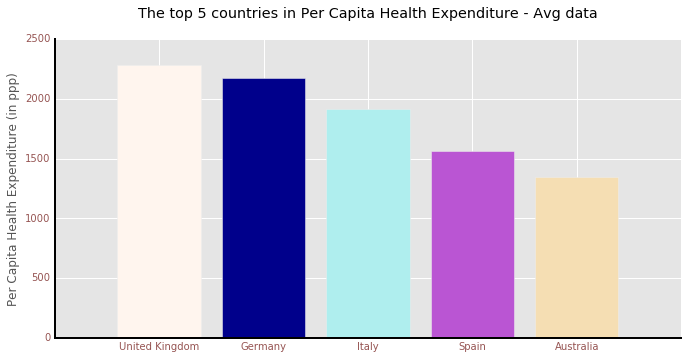

In [49]:
# Plot top 5 countries in Per Capita Health Expenditure
style.use('ggplot')
fig = plt.figure()

Mycolors = list(six.iteritems(colors.cnames))
Mycolors

# Plot size
plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,1),(0,0))

Country_index = []
for i in range (4+1):
    Country_index.append(i)
    
# Plot bar chart
for i in range (4+1):
    ax1.bar(Country_index[i], Hlt_Top5_PerCap.ix[i, 0], color = Mycolors[i], 
            label= Hlt_Top5_PerCap.index.tolist()[i], align='center')

# Replace number on x-axis with labels
plt.xticks(Country_index, Hlt_Top5_PerCap.index.tolist())

# Customize label
for label in ax1.xaxis.get_ticklabels():
    label.set_color('#955351')

# Customize labels
for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# Title and labels
plt.title("The top 5 countries in Per Capita Health Expenditure - Avg data\n")
plt.ylabel('Per Capita Health Expenditure (in ppp)')
plt.show()

I'll now compare Education+Health to Defense (Totals values as well as Percentage of GDP)

In [50]:
# Add Average for Education and Health Expenditures
eduExpToGDP_prct["Avg Edu Expenditure"] = eduExpToGDP_prct.mean(numeric_only=True, axis=1)
hltExpToGDP_prct["Avg Hlt Expenditure"] = hltExpToGDP_prct.mean(numeric_only=True, axis=1)
eduExpToGDP_prct_f = eduExpToGDP_prct.ix[:,"Avg Edu Expenditure"]; hltExpToGDP_prct_f = hltExpToGDP_prct.ix[:,"Avg Hlt Expenditure"]
# Concatenate the previous 2 columns
edyHltExpToGDP_prct = pd.concat([eduExpToGDP_prct_f, hltExpToGDP_prct_f], axis=1, join='inner')
edyHltExpToGDP_prct

,Avg Edu Expenditure,Avg Hlt Expenditure
country,,
United States of America,0.662093,1.967418
China,3.262660,1.021926
Japan,1.191037,0.176467
Germany,4.175286,6.839378
United Kingdom,5.954518,6.995935
Italy,4.527015,6.877392
Brazil,1.609734,1.698989
Republic of Korea,3.172511,0.175093
Australia,1.797550,3.826497


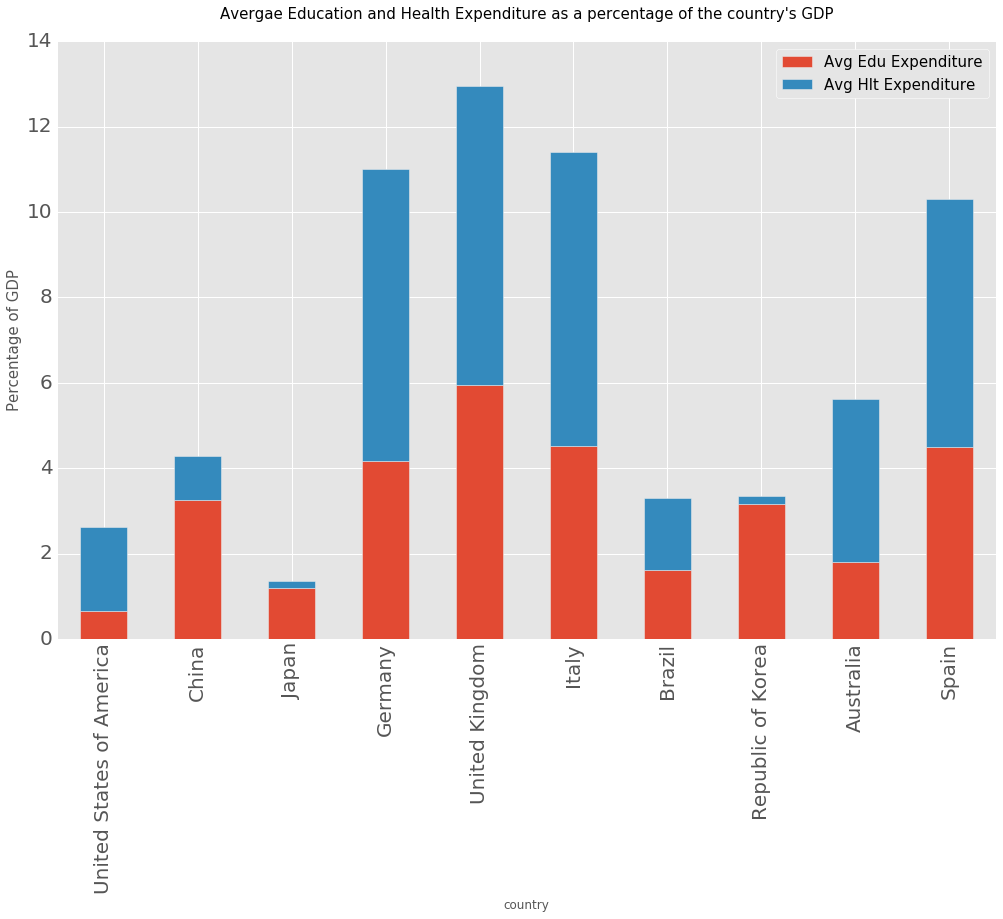

In [51]:
# Plot the previous dataframe for all 10 countries -- stacked bar chart
ax = edyHltExpToGDP_prct.plot(kind="bar", stacked=True, subplots=False, figsize=(15,10), fontsize=20) 
# For legend labels 
AvgEduCol, AvgHltCol = ax.get_legend_handles_labels()
ax.legend(AvgEduCol, AvgHltCol, loc='best', fontsize=15)
# Y label and title
ax.set_ylabel('Percentage of GDP', fontsize=15)
ax.set_title("Avergae Education and Health Expenditure as a percentage of the country's GDP\n", fontsize=15)

Compare the sum of the Per Capita Educaiton and Health Expenditure (combined), and the country's Defense Expenditure...

In [52]:
# Summing Educational and Health per capita expenditures
Edu_Hlth_Def_ToGdp = pd.DataFrame()
Edu_Hlth_Def_ToGdp["Avg Education and Health Expenditure/gdp"] = edyHltExpToGDP_prct['Avg Edu Expenditure'] + edyHltExpToGDP_prct['Avg Hlt Expenditure']

# Avg for Defense per capita expeditures
defExpToGDP_prct["Avg"] = defExpToGDP_prct.mean(numeric_only=True, axis=1); 
Edu_Hlth_Def_ToGdp["Avg Defense Expenditure/gdp"] = defExpToGDP_prct["Avg"]
Edu_Hlth_Def_ToGdp

,Avg Education and Health Expenditure/gdp,Avg Defense Expenditure/gdp
country,,
United States of America,2.629511,3.816004
China,4.284586,1.332906
Japan,1.367504,0.984300
Germany,11.014665,1.049064
United Kingdom,12.950453,2.475048
Italy,11.404407,1.329061
Brazil,3.308723,0.953656
Republic of Korea,3.347604,2.400249
Australia,5.624047,1.467589


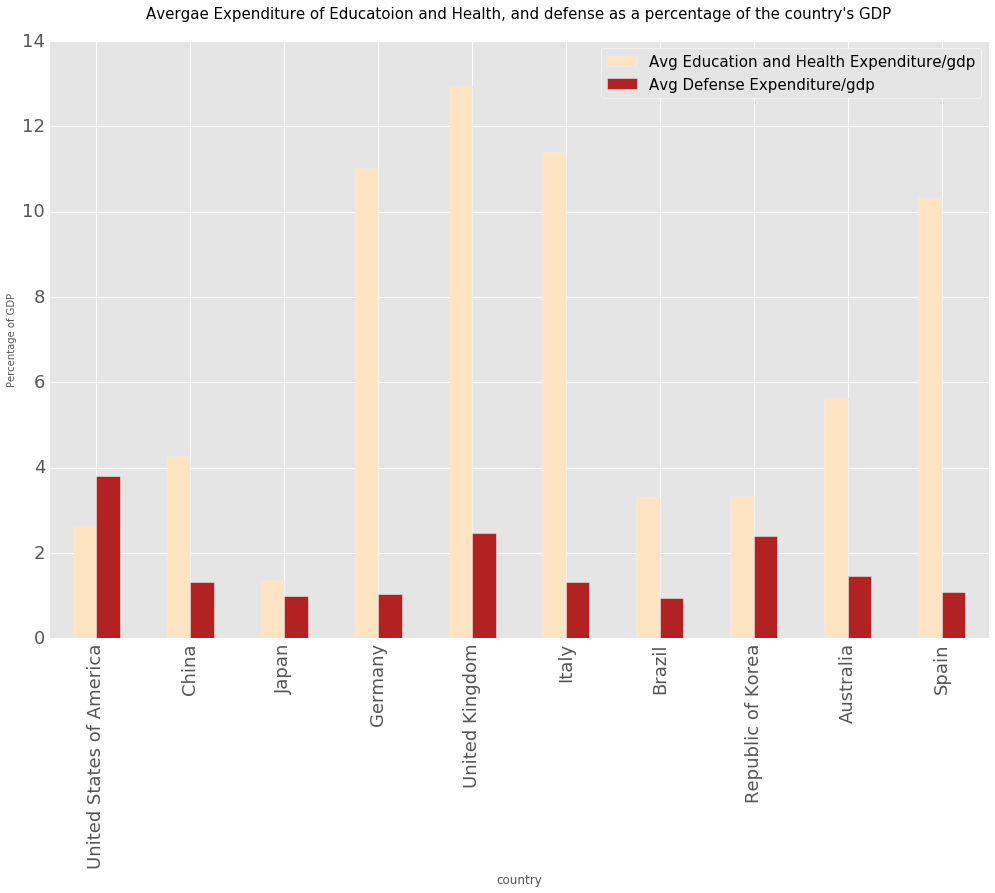

In [53]:
# Plot Education+Health expenditures to Defense expenditures
ax1 = Edu_Hlth_Def_ToGdp.plot.bar(figsize=(15,10), title=False, legend=True, xticks=None, yticks=None, fontsize=18, color=("bisque", "firebrick"))
# Get labels for legend
Edu_Hlth_Col, Def_Col = ax1.get_legend_handles_labels()
ax1.legend(Edu_Hlth_Col, Def_Col, loc='best', fontsize=15)
# Y label and plot title
ax1.set_ylabel('Percentage of GDP', fontsize=10)
ax1.set_title("Avergae Expenditure of Educatoion and Health, and defense as a percentage of the country's GDP\n", fontsize=15)


The United States is the only country that has a defense expenditure more than the education and health expenditures combined. 
I will redo that plot after adding the social protection to health and education expenditures

In [54]:
# Add Social Protection
spExpToGDP_prct["Avg S.P. Expenditure"] = spExpToGDP_prct.mean(numeric_only=True, axis=1)
edyHltSpExpToGDP_prct = pd.DataFrame()
edyHltSpExpToGDP_prct["Avg Education, Health, and Social Protection Expenditure/gdp"] = Edu_Hlth_Def_ToGdp["Avg Education and Health Expenditure/gdp"] + spExpToGDP_prct["Avg S.P. Expenditure"]
edyHltSpExpToGDP_prct["Avg Defense Expenditure/gdp"]=Edu_Hlth_Def_ToGdp["Avg Defense Expenditure/gdp"]
edyHltSpExpToGDP_prct

,"Avg Education, Health, and Social Protection Expenditure/gdp",Avg Defense Expenditure/gdp
country,,
United States of America,12.969332,3.816004
China,6.341523,1.332906
Japan,6.278206,0.984300
Germany,31.605633,1.049064
United Kingdom,28.783166,2.475048
Italy,29.962832,1.329061
Brazil,13.486807,0.953656
Republic of Korea,6.788094,2.400249
Australia,14.498210,1.467589


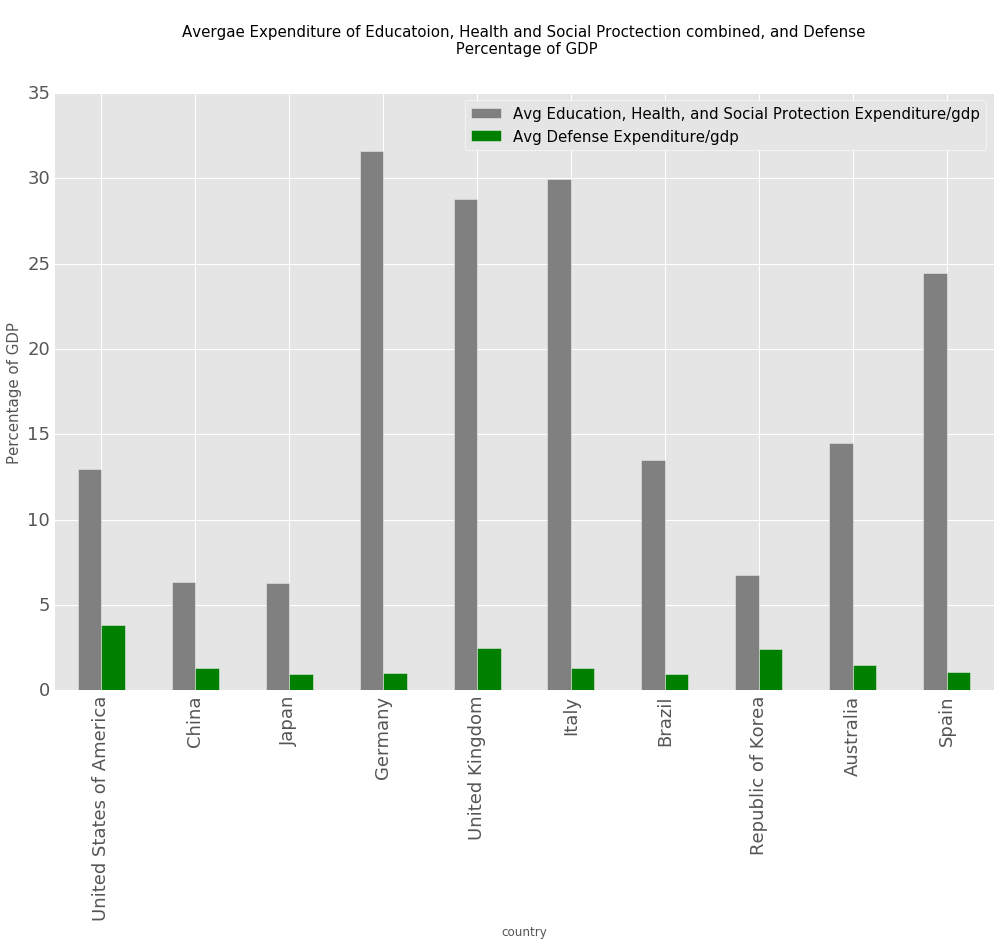

In [55]:
# Plot -- bar plot
ax1 = edyHltSpExpToGDP_prct.plot.bar(figsize=(15,10), fontsize=18, color=("gray", "green"))
# Get labels
EdHtSp_Clr, Def_Clr = ax1.get_legend_handles_labels()
ax1.legend(EdHtSp_Clr, Def_Clr, loc='best', fontsize=15)
ax1.set_ylabel('Percentage of GDP', fontsize=15)
ax1.set_title("\nAvergae Expenditure of Educatoion, Health and Social Proctection combined, and Defense\n Percentage of GDP\n\n", fontsize=15)
# CHANGE THE LABEL AVG EDUCATION+HEALTH EXP/GDP? YOU KNOW YOU COULD DO BETER THAN THAT

**Section 5: Summing the per capita expenditures for the different four sectors, and try to get an overall trend for the world (data of Zimbabwe and the Occupied Palestinian Territory will be excluded due to inaccuracy)**

In [56]:
'''
# Assign all sectors for all 147 countries to new variables -- Percentage of GDP
agrExp_Tot_prct_all = sheet_6.ix[:147, :]
eduExp_Tot_prct_all = sheet_11.ix[:147, :]
hltExp_Tot_prct_all = sheet_16.ix[:147, :]
defExp_Tot_prct_all = sheet_21.ix[:147, :]
spExp_Tot_prct_all = sheet_41.ix[:147, :]
agrExp_Tot_prct_all.head(4)
'''

'\n# Assign all sectors for all 147 countries to new variables -- Percentage of GDP\nagrExp_Tot_prct_all = sheet_6.ix[:147, :]\neduExp_Tot_prct_all = sheet_11.ix[:147, :]\nhltExp_Tot_prct_all = sheet_16.ix[:147, :]\ndefExp_Tot_prct_all = sheet_21.ix[:147, :]\nspExp_Tot_prct_all = sheet_41.ix[:147, :]\nagrExp_Tot_prct_all.head(4)\n'

In [57]:
# Assign all sectors for all 147 countries to new variables -- Per Capita Expenditure
# Education
eduExp_PerCap_all = sheet_10.ix[:147, -13:]; eduExp_PerCap_all["Avg Educational Exp./Capita."] = eduExp_PerCap_all.mean(numeric_only=True, axis=1)
# Drop NA
eduExp_PerCap_all.dropna(axis=0, how='any', inplace=True)
print("\nEducation count:\n", eduExp_PerCap_all.count())

# Health
hltExp_PerCap_all = sheet_15.ix[:147, -13:]; hltExp_PerCap_all["Avg Health Exp./Capita."] = hltExp_PerCap_all.mean(numeric_only=True, axis=1)
# Drop NA
hltExp_PerCap_all.dropna(axis=0, how='any', inplace=True)
print("\nHealth count:\n", hltExp_PerCap_all.count())

# Social Protection
spExp_PerCap_all = sheet_40.ix[:147, -13:]; spExp_PerCap_all["Avg Social Protection Exp./Capita."] = spExp_PerCap_all.mean(numeric_only=True, axis=1)
# Drop NA
spExp_PerCap_all.dropna(axis=0, how='any', inplace=True)
print("\nSocial Protection count:\n", spExp_PerCap_all.count())

# Defense
defExp_PerCap_all = sheet_20.ix[:147, -13:]; defExp_PerCap_all["Avg Defense Exp./Capita."] = defExp_PerCap_all.mean(numeric_only=True, axis=1)
# Drop NA
defExp_PerCap_all.dropna(axis=0, how='any', inplace=True)
print("\nDefense count:\n", defExp_PerCap_all.count())

# Total
totExp_PerCap_all = sheet_60.ix[:147, -13:]; totExp_PerCap_all["Avg Total Exp./Capita."] = totExp_PerCap_all.mean(numeric_only=True, axis=1)
# Drop NA
totExp_PerCap_all.dropna(axis=0, how='any', inplace=True)
print("\nTotal count:\n", totExp_PerCap_all.count())


Education count:
 2000                            76
2001                            76
2002                            76
2003                            76
2004                            76
2005                            76
2006                            76
2007                            76
2008                            76
2009                            76
2010                            76
2011                            76
2012                            76
Avg Educational Exp./Capita.    76
dtype: int64

Health count:
 2000                       76
2001                       76
2002                       76
2003                       76
2004                       76
2005                       76
2006                       76
2007                       76
2008                       76
2009                       76
2010                       76
2011                       76
2012                       76
Avg Health Exp./Capita.    76
dtype: int64

Social Protection count:
 20

For consistency reasons, we are going to use the first 70 records of each dataframe

In [58]:
# For all sectors, slice only to 70 countries, and transpose
eduExp_PerCap_all_trnsp = eduExp_PerCap_all.ix[:70,:].transpose()
hltExp_PerCap_all_trnsp = hltExp_PerCap_all.ix[:70,:].transpose()
spExp_PerCap_all_trnsp  = spExp_PerCap_all.ix[:70,:].transpose()
defExp_PerCap_all_trnsp = defExp_PerCap_all.ix[:70,:].transpose()
totExp_PerCap_all_trnsp = totExp_PerCap_all.ix[:70,:].transpose()

In [59]:
# All a column that sums the values of each division for all 70 countries
eduExp_PerCap_all_trnsp["Total Educational Expenditure Per Capita"] = eduExp_PerCap_all_trnsp.sum(numeric_only=True, axis=1)
hltExp_PerCap_all_trnsp["Total Health Expenditure Per Capita"] = hltExp_PerCap_all_trnsp.sum(numeric_only=True, axis=1)
spExp_PerCap_all_trnsp["Total Social Protection Expenditure Per Capita"]  = spExp_PerCap_all_trnsp.sum(numeric_only=True, axis=1)
defExp_PerCap_all_trnsp["Total Defense Expenditure Per Capita"] = defExp_PerCap_all_trnsp.sum(numeric_only=True, axis=1)
totExp_PerCap_all_trnsp["Total Expenditure Per Capita"] = totExp_PerCap_all_trnsp.sum(numeric_only=True, axis=1)

In [60]:
# Concatenate into one dataframe to plot
All_ForComp = pd.concat([eduExp_PerCap_all_trnsp["Total Educational Expenditure Per Capita"], 
                         hltExp_PerCap_all_trnsp["Total Health Expenditure Per Capita"], 
                         spExp_PerCap_all_trnsp["Total Social Protection Expenditure Per Capita"], 
                         defExp_PerCap_all_trnsp["Total Defense Expenditure Per Capita"]], axis=1, join='inner')
All_ForComp

,Total Educational Expenditure Per Capita,Total Health Expenditure Per Capita,Total Social Protection Expenditure Per Capita,Total Defense Expenditure Per Capita
2000,53928.937766,47694.786283,122070.538968,30900.962918
2001,56467.577682,50471.694803,127384.056421,32378.537187
2002,58905.934669,53599.430658,132154.600913,33330.980282
2003,60502.592161,56380.687979,135871.746629,33521.488400
2004,61176.744553,58362.252661,140428.613317,32826.942213
2005,62635.788424,60268.881943,145692.245497,30640.139882
2006,63938.450647,62083.090622,153020.188226,30257.240600
2007,65470.997429,63592.693037,149026.583549,31251.900865
2008,67399.913177,66783.174354,170947.060424,29997.306880
2009,70769.440041,69626.884518,169685.160984,31578.430283


In [61]:
# Statistical summary 
All_ForComp.describe()

,Total Educational Expenditure Per Capita,Total Health Expenditure Per Capita,Total Social Protection Expenditure Per Capita,Total Defense Expenditure Per Capita
count,13.000000,13.000000,13.000000,13.000000
mean,63821.346397,61038.309554,150528.688760,31378.940025
std,5449.971839,7324.160600,18216.976152,1330.283057
min,53928.937766,47694.786283,122070.538968,29630.652776
25%,60502.592161,56380.687979,135871.746629,30257.240600
50%,63938.450647,62083.090622,149026.583549,31251.900865
75%,69052.317690,67747.366237,169645.885343,32378.537187
max,70769.440041,69626.884518,172138.841098,33521.488400


In [62]:
# put back in the original form
All_ForComp_Transp = All_ForComp.transpose()
All_ForComp_Transp

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Total Educational Expenditure Per Capita,53928.937766,56467.577682,58905.934669,60502.592161,61176.744553,62635.788424,63938.450647,65470.997429,67399.913177,70769.440041,70086.728407,69052.317690,69342.080511
Total Health Expenditure Per Capita,47694.786283,50471.694803,53599.430658,56380.687979,58362.252661,60268.881943,62083.090622,63592.693037,66783.174354,69626.884518,68729.421679,67747.366237,68157.659434
Total Social Protection Expenditure Per Capita,122070.538968,127384.056421,132154.600913,135871.746629,140428.613317,145692.245497,153020.188226,149026.583549,170947.060424,169685.160984,172138.841098,169645.885343,168807.432516
Total Defense Expenditure Per Capita,30900.962918,32378.537187,33330.980282,33521.488400,32826.942213,30640.139882,30257.240600,31251.900865,29997.306880,31578.430283,29630.652776,29798.801119,31812.836918


Let's check the correlation between Educational Expenditure Per Capita, and the Defense Expenditure Per Capita

In [63]:
All_ForComp_Transp.ix["Total Educational Expenditure Per Capita"].corr(All_ForComp_Transp.ix["Total Defense Expenditure Per Capita"])

-0.49430617776474378

As can be seen, a high negative correlation exists between the dducation expenditure and the defense expenditure. That means that the higher the Defense expenditure goes in a certain country the lower the education expenditure goes, which clealy impacts that country's warefare.
Similarly with health...

In [ ]:
All_ForComp_Transp.ix["Total Health Expenditure Per Capita"].corr(All_ForComp_Transp.ix["Total Defense Expenditure Per Capita"])

In [ ]:
# Prepare for plotting the sum of the Total Per Capita Expenditure as a separate plot
totExp_PerCap_all_plt = totExp_PerCap_all_trnsp["Total Expenditure Per Capita"]
totExp_PerCap_all_plt = pd.DataFrame(totExp_PerCap_all_plt)
# Add the Total Per Capita Expenditure column
totExp_PerCap_all_plt["Total Expenditure Per Capita"]
TotalExp_ToPlot = totExp_PerCap_all_plt.transpose()
del TotalExp_ToPlot["Avg Total Exp./Capita."]
TotalExp_ToPlot

In [ ]:
# Plot for the total Per Capita Spendings for all four sectors and 70 countries over 12 years
style.use('ggplot')
fig = plt.figure()
plt.figure(figsize=(15,8))

# List of years
years = []
for i in range(2000, 2012+1):
    years.append(i)

# List of colors
col_list = ["orange", "gray", "green", "#955351"]
col_list

# Label list
Division_list = ["Education", "Health", "Social Protection", "Defense"]

# First plot
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)

# Plot function
def plot_data(years, df_index, colors):
    ax1.plot(years, df_index,  label=Division_list[i], color= colors)

for i in range (0,3+1):
    plot_data(years, All_ForComp_Transp.ix[i], col_list[i])

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# Labels customizations
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#155260')
    
for label in ax1.yaxis.get_ticklabels():
    label.set_color('#155260')

# Annatation
plt.annotate('2008 Recession effect', (2009, 72000), xytext=(0.4, 0.45), textcoords='axes fraction',
            arrowprops= dict(facecolor='grey', color='#155260'), fontsize=12)

# Title, labels, and legends
plt.xlabel('Year', fontsize=14)
plt.ylabel('Per Capita Expenditure (in ppp)', fontsize=14)
plt.title('\nPer Capita Expenditure trend over the period from 2000 to 2012\n -70 countries data- \n \n', fontsize=13)
plt.legend(bbox_to_anchor=(0.6, 0.9), loc=2, borderaxespad=1, fontsize=12)

# Second plot   
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=2)

# Plot function
ax2.plot(years, TotalExp_ToPlot.ix[0], "#050341")

# Spines
ax2.spines['left'].set_color('k')
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_color('k')
ax2.spines['bottom'].set_linewidth(2)

# Labels customizations
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#155260')

for label in ax2.yaxis.get_ticklabels():
    label.set_color('#155260')

# Annatation
plt.annotate('2008 Recession effect', (2009, 582000), xytext=(0.65, 0.7), textcoords='axes fraction',
            arrowprops= dict(facecolor='grey', color='#155260'), fontsize=12)

# Title, labels, and legends
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Per Capita Expenditure (in ppp)', fontsize=14)
plt.title('\nTotal Per Capita Expenditure over the period from 2000 to 2012\n -70 countries data- \n \n', fontsize=13)
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=1, fontsize=12)

plt.show()

It's clear in those two plots the effect of the 2008 recession, the overall spending trends in individual division as well as the total trend has been decreasing starting 2008/2009.